# Exercise 1: Homogeneous Coordinates and Pinhole Model

In [4]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

print(cv2.__version__)

4.7.0


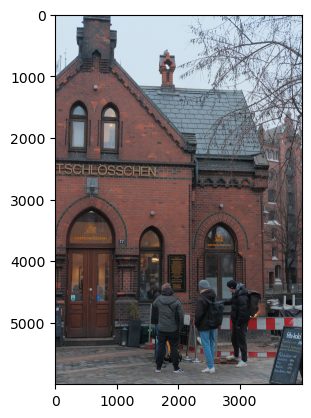

In [2]:
im = cv2.imread('hamburg-1.jpg') #stored as BGR as default

#Flip BGR to RGB
im = im[:,:,::-1] 

plt.imshow(im)

In [3]:
#Check generated points using itertools
a = [(1, )*16, ()]
points = []
n = 16
N = tuple(np.linspace(-0.5,0.5,n))
for i, j in [(-0.5,-0.5), (-0.5,0.5), (0.5,0.5), (0.5,-0.5)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
print(N)
print(np.hstack(points)/2)

(-0.5, -0.43333333333333335, -0.3666666666666667, -0.3, -0.23333333333333334, -0.16666666666666669, -0.09999999999999998, -0.033333333333333326, 0.033333333333333326, 0.09999999999999998, 0.16666666666666663, 0.23333333333333328, 0.30000000000000004, 0.3666666666666667, 0.43333333333333335, 0.5)
[[-0.25       -0.25       -0.25       -0.25       -0.25       -0.25
  -0.25       -0.25       -0.25       -0.25       -0.25       -0.25
  -0.25       -0.25       -0.25       -0.25       -0.25       -0.21666667
  -0.18333333 -0.15       -0.11666667 -0.08333333 -0.05       -0.01666667
   0.01666667  0.05        0.08333333  0.11666667  0.15        0.18333333
   0.21666667  0.25       -0.25       -0.25       -0.25       -0.25
  -0.25       -0.25       -0.25       -0.25       -0.25       -0.25
  -0.25       -0.25       -0.25       -0.25       -0.25       -0.25
  -0.25       -0.21666667 -0.18333333 -0.15       -0.11666667 -0.08333333
  -0.05       -0.01666667  0.01666667  0.05        0.08333333  0.11

Text(0.5, 0, 'Z')

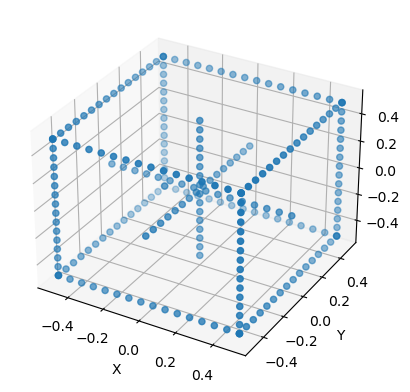

In [5]:
#Exercise 1.11


def box3d(n=16):
    #Create 3D box
    points=[]
    N = tuple(np.linspace(-1,1,n))
    for i, j in [(-1,-1), (-1,1), (1,1), (0,0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    
    return np.hstack(points)/2

sample = box3d()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D box
ax.scatter(sample[0], sample[1], sample[2])


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [7]:
#Exercise 1.12

def Pi(p): #converts from homogeneous to inhomogeneous
    q = p[:-1]/p[-1] #q is inhomogeneous

    return q

def PiInv(q): #inhomogeneous to homogeneous
    p= np.vstack((q, np.ones(q.shape[1]))) #stack the inhomogenous with (1, )*n
    return(p) #p is homogeneous

ph = np.array([[1, 2, 3], [4, 5, 6], [4, 5, 9]]) #example

q = Pi(ph)
p = PiInv(q)

print(q)
print(p)

[[0.25       0.4        0.33333333]
 [1.         1.         0.66666667]]
[[0.25       0.4        0.33333333]
 [1.         1.         0.66666667]
 [1.         1.         1.        ]]


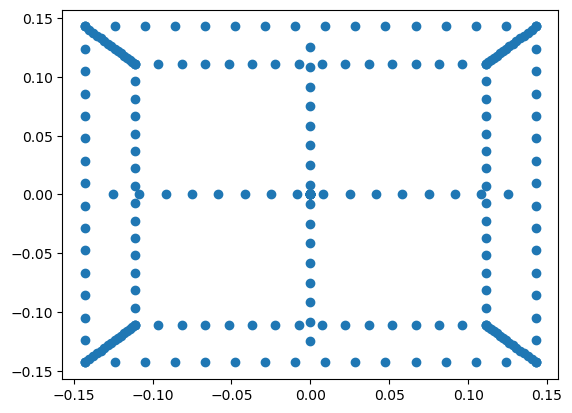

In [8]:
#Exercise 1.13

'''
Now lets us make our “camera”. Create a function projectpoints, that takes as inputs:
• the camera matrix K
• the pose of the camera (R, t)
• a 3 × n matrix (Q), representing n points in 3D to be projected into the camera.
The function should return the projected 2D points as a 2 × n matrix.
Test your function Q = box3d,
Tip: You can do matrix multiplication in Numpy using @, for example A@b.
'''

#Camera matrix
K = np.diag([1,1,1])
R = K
t = np.array([0,0,4]).reshape(-1,1)
Q = box3d()

def projectpoints(K, R, t, Q):

    Rt = np.hstack((R,t))
    ph = PiInv(Q)
    P = K @ (Rt@ph)
    return Pi(P)

p = projectpoints(K,R,t,Q)
plt.scatter(p[0], p[1])


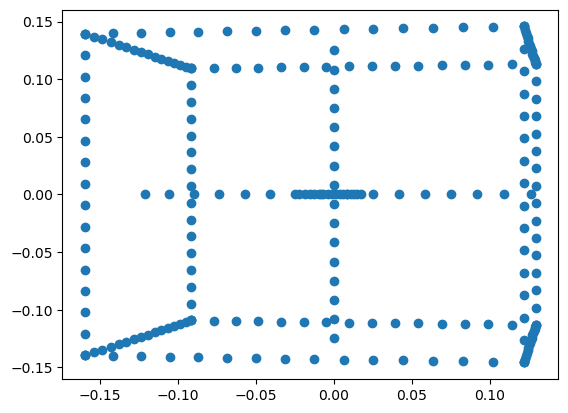

In [9]:
#Exercise 1.14
# Add rotation matrix
theta = 30
R = np.array([[np.cos(theta), 0, np.sin(theta)],
              [0,1,0],
              [-np.sin(theta), 0, np.cos(theta)]])

p = projectpoints(K,R,t,Q)
plt.scatter(p[0], p[1])

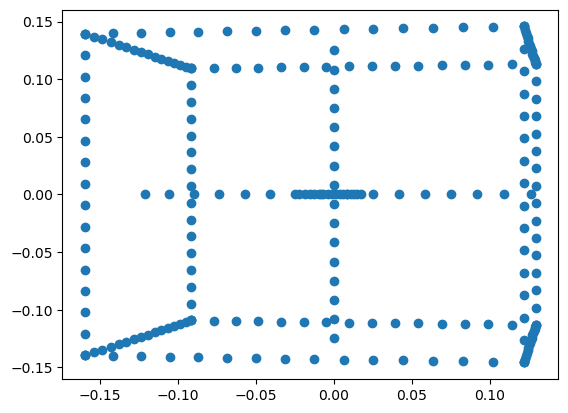

In [10]:
#Exercise 1.15
#Add t matrix
t = np.array([0,0,4]).reshape(-1,1)
p = projectpoints(K,R,t,Q)
plt.scatter(p[0], p[1])
